# Exercise 3 : Multi-layer Networks with Keras

### MNIST

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np

Load MNIST dataset

In [2]:
(trainX, trainY), (testX, testY) = mnist.load_data()

Modify data to train in MLP model
* Change value range from 0 to 1
* Change data shape to one dimension

In [3]:
trainX.shape    # 이미지 개수, 높이, 너비

(60000, 28, 28)

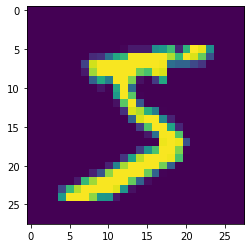

In [4]:
trainX.shape 
plt.imshow(trainX[0])

In [5]:
trainY[0]   # 정답

5

In [6]:
trainX.min(), trainX.max()

(0, 255)

In [7]:
trainX.min(), trainX.max()

(0, 255)

In [8]:
trainX = trainX / 255.
trainX = trainX.reshape(-1, 28*28)
trainX.shape

(60000, 784)

In [9]:
testX = testX / 255.
testX = testX.reshape(-1, 28*28)
testX.shape

(10000, 784)

Change label to one-hot encoder

In [10]:
trainY[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [11]:
trainY = to_categorical(trainY)
testY = to_categorical(testY)

In [12]:
trainY[:5]     # 정답데이터셋

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Define the 784-256-128-10 architecture using Keras

In [13]:
# input - 2 hidden layers - output
model = Sequential()
model.add(Dense(256, input_shape=(784,), activation = 'sigmoid'))
model.add(Dense(128, activation = 'sigmoid'))    # 이미 위에서 명시 해놨기 때문에 keras가 알아서 해줌
#위에랑 코드 똑같음
#from tensorflow.keras.layers import Activation 라이브러리 만든 후
#model.add(Dense(128))
#model.add(Activation('sigmoid'))
model.add(Dense(10, activation = 'softmax'))

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [15]:
# 256*(28*28+1) = 200960  -.>  bias 까지 1더해줌

Train the model usign SGD

In [16]:
sgd = SGD(0.01)   # optimizer 종류
model.compile(loss = 'categorical_crossentropy', optimizer = sgd, metrics = ["accuracy"])

In [17]:
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=10, batch_size=128, verbose=1)   # (trainX.shape[0]/128 * 10 만큼 가중치 업데이트)

Epoch 1/10
469/469 [==============================] - 2s 3ms/step - loss: 2.2819 - accuracy: 0.1846 - val_loss: 2.2427 - val_accuracy: 0.2997
Epoch 2/10
469/469 [==============================] - 1s 3ms/step - loss: 2.2078 - accuracy: 0.3942 - val_loss: 2.1661 - val_accuracy: 0.4147
Epoch 3/10
469/469 [==============================] - 1s 3ms/step - loss: 2.1185 - accuracy: 0.5068 - val_loss: 2.0590 - val_accuracy: 0.5979
Epoch 4/10
469/469 [==============================] - 1s 3ms/step - loss: 1.9900 - accuracy: 0.5886 - val_loss: 1.9024 - val_accuracy: 0.6154
Epoch 5/10
469/469 [==============================] - 1s 3ms/step - loss: 1.8114 - accuracy: 0.6316 - val_loss: 1.6986 - val_accuracy: 0.6624
Epoch 6/10
469/469 [==============================] - 1s 3ms/step - loss: 1.5968 - accuracy: 0.6745 - val_loss: 1.4757 - val_accuracy: 0.7034
Epoch 7/10
469/469 [==============================] - 1s 3ms/step - loss: 1.3833 - accuracy: 0.7171 - val_loss: 1.2732 - val_accuracy: 0.7360
Epoch 

Evaluate the trained network

In [19]:
model.evaluate(testX, testY, batch_size = 128)

79/79 [==============================] - 0s 2ms/step - loss: 0.8815 - accuracy: 0.8025


[0.8815221786499023, 0.8025000095367432]

In [23]:
predictions = model.predict(testX, batch_size = 128)
predictions[:3].argmax(axis = 1)    # 큰값이 있는 위치 반환

array([7, 2, 1])

Use `classification_report` to measure the performance of your model.

In [25]:
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       980
           1       0.82      0.97      0.89      1135
           2       0.88      0.78      0.83      1032
           3       0.71      0.84      0.77      1010
           4       0.73      0.80      0.77       982
           5       0.83      0.49      0.62       892
           6       0.85      0.90      0.87       958
           7       0.84      0.86      0.85      1028
           8       0.80      0.70      0.74       974
           9       0.73      0.67      0.70      1009

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.79     10000
weighted avg       0.80      0.80      0.80     10000



Plot the training loss and accuracy

In [26]:
H.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

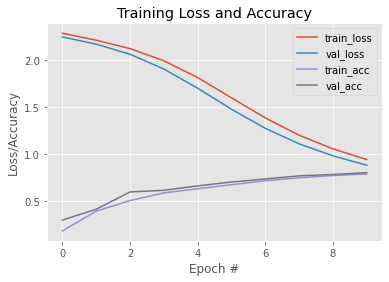

In [30]:
plt.style.use("ggplot")
plt.figure()

plt.plot(np.arange(0, 10), H.history["loss"], label = "train_loss")
plt.plot(np.arange(0, 10), H.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, 10), H.history["accuracy"], label = "train_acc")
plt.plot(np.arange(0, 10), H.history["val_accuracy"], label = "val_acc")

plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()